# K-Nearest Neighbors

## Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import time

In [35]:
data = pd.read_csv('data/league_data_cleaned.csv')

data.head()

,matchId,blueTeamFirstBlood,blueTeamControlWardsPlaced_diff,blueTeamWardsPlaced_diff,blueTeamTotalKills_diff,blueTeamDragonKills_diff,blueTeamHeraldKills_diff,blueTeamTowersDestroyed_diff,blueTeamInhibitorsDestroyed_diff,blueTeamTurretPlatesDestroyed_diff,blueTeamMinionsKilled_diff,blueTeamJungleMinions_diff,blueTeamTotalGold_diff,blueTeamXp_diff,blueTeamTotalDamageToChamps_diff,blueWin
0,EUW1_6882489515,0,-4,-11,-12,2,0,-2,0,-6,-12,12,-5714,-2815,-5397,1
1,EUW1_6882416210,0,-4,20,-5,1,0,0,0,-6,-25,22,-1118,210,-768,0
2,EUW1_6881092720,0,-1,-222,-5,-1,0,-2,0,-8,-9,12,-2384,37,-4945,0
3,EUW1_6879405717,1,3,5,-2,-1,1,1,0,-4,-23,-3,2176,-603,3109,0
4,EUW1_6879389461,0,-4,4,4,0,1,0,0,-2,-12,4,1720,1591,7431,1


In [36]:
data.shape

(24218, 16)

In [37]:
X = data.drop(['matchId', 'blueWin'], axis=1)  
y = data['blueWin']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We can now train the model. First, we test with a fixed k-value of 20. We create n instances of the KNN model, then fit this to our training data.

In [40]:
knn = KNeighborsClassifier(n_neighbors=20)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time}")

Training time: 0.005501985549926758


With the model now trained we can make predictions on the test dataset.

In [41]:
y_pred = knn.predict(X_test)

To evaluate this model we use accuracy by checking the predictions against the actual values in the test set and count up how many the model got right.

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7613542526837325
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2470
           1       0.77      0.73      0.75      2374

    accuracy                           0.76      4844
   macro avg       0.76      0.76      0.76      4844
weighted avg       0.76      0.76      0.76      4844



With an accuracy of 73%, which represents the proportion of correctly classified instances (positive and negative) out of the total instances. 

For class 0 (positives), the precision was 73% -- proportion of true positives out of all instances classified as positive, with 76% being correctly predicted as positive, which has a F1 score of 0.74. There are 2425 instances of class 0.

For class 1 (negatives), the precision was 75% -- proportion of true negatives out of all instances classified as negative, with 71% being correctly predicted as negative, which has a F1 score of 0.73. There are 2419 instances of class 1.

## Cross-validation

To find the best value for k we loop through many different values. We store our result and use cross-validation to find the accuracy scores. For our implementation, we use scikit-learn's cross_val_score. We split the data into 10 parts, 9 will be used to train and 1 to test the result. It will loop through each group and give an accuracy score to average and find the best model.

In [43]:
k_values = [i for i in range (1, 51)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    scores.append(np.mean(score))

We can see that after 25 k-values, the accuracy score remains the same at around 74% and 75%.

Text(0, 0.5, 'Accuracy Score')

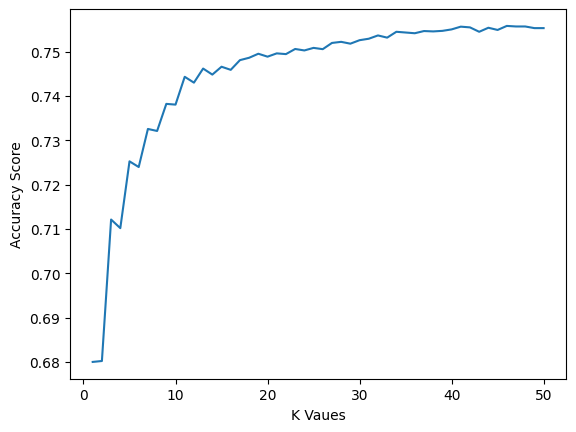

In [44]:
sns.lineplot(x = k_values, y = scores, markers= 'o')
plt.xlabel("K Vaues")
plt.ylabel("Accuracy Score")

Now that we've found the best k values, we can train our model with it.

In [45]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

print('Time to train:', end_time - start_time)

Time to train: 0.005700826644897461


Accuracy: 0.7650701899256812
Precision: 0.7679965307892455
Recall: 0.7459983150800337


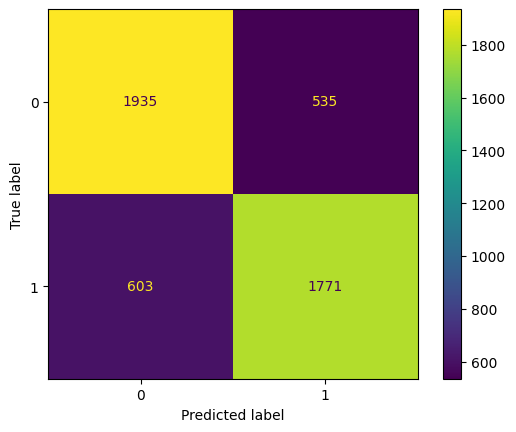

In [46]:
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()